In [1]:
import pandas as pd

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [11]:
complaints = pd.read_csv('data/311-service-requests.csv')

/home/abhay/.virtualenvs/Data_Science/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
complaints.shape

(111069, 52)

In [9]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [10]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

In [12]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null object
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      102247 non

In [22]:
complaints.shape

(111069, 52)

In [13]:
complaints.index

RangeIndex(start=0, stop=111069, step=1)

In [14]:
complaints[0:4] ## by implicit integer indexing

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"


In [29]:
complaints.iloc[0] ## get the first row 

Unique Key                                                       26589651
Created Date                                       10/31/2013 02:08:41 AM
Closed Date                                                           NaN
Agency                                                               NYPD
Agency Name                               New York City Police Department
Complaint Type                                    Noise - Street/Sidewalk
Descriptor                                                   Loud Talking
Location Type                                             Street/Sidewalk
Incident Zip                                                        11432
Incident Address                                         90-03 169 STREET
Street Name                                                    169 STREET
Cross Street 1                                                  90 AVENUE
Cross Street 2                                                  91 AVENUE
Intersection Street 1                 

In [32]:
complaints.iloc[0,0]  ## get the first row and first column value

26589651

In [34]:
complaints.ix[0,'Location']  ## mixing integer index and named index , deprecated 

'(40.70827532593202, -73.79160395779721)'

In [15]:
complaints[0]   ## throws error when try to access by row index

KeyError: 0

In [16]:
complaints.loc[0]   ## accessing by index names

Unique Key                                                       26589651
Created Date                                       10/31/2013 02:08:41 AM
Closed Date                                                           NaN
Agency                                                               NYPD
Agency Name                               New York City Police Department
Complaint Type                                    Noise - Street/Sidewalk
Descriptor                                                   Loud Talking
Location Type                                             Street/Sidewalk
Incident Zip                                                        11432
Incident Address                                         90-03 169 STREET
Street Name                                                    169 STREET
Cross Street 1                                                  90 AVENUE
Cross Street 2                                                  91 AVENUE
Intersection Street 1                 

In [38]:
complaints.loc[:,'Location']  ## get the values from the column location

0          (40.70827532593202, -73.79160395779721)
1         (40.721040535628305, -73.90945306791765)
2          (40.84332975466513, -73.93914371913482)
3           (40.7780087446372, -73.98021349023975)
4          (40.80769092704951, -73.94738703491433)
5           (40.7499893014072, -73.88198770727831)
6          (40.68153278675525, -73.83173699701601)
7          (40.67181584567338, -73.84309181950769)
8          (40.73991339303542, -74.00079028612932)
9          (40.66820406598287, -73.95064760056546)
10         (40.63437840816299, -73.96946177104543)
11         (40.73081644089586, -73.98607265739876)
12         (40.78897400211689, -73.95225898702977)
13         (40.89151738488846, -73.83645714593568)
14          (40.6264774690411, -73.99921826202639)
15          (40.7965967075252, -73.97036973473399)
16          (40.63618202176914, -74.1161500428337)
17         (40.63243692394328, -73.88817263437012)
18                                             NaN
19         (40.85205827756883, 

# 2.2 Selecting columns and rows


To select a column, we index with the name of the column, like this:

In [13]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

In [14]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


We can combine these to get the first 5 rows of a column:

In [15]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

and it doesn't matter which direction we do it in:

In [18]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [21]:
complaints[['Complaint Type', 'Borough']][:6]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS


In [ ]:
complaints[['Complaint Type', 'Borough']][:10]

#  What's the most common complaint type?

In [64]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]



HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

In [22]:
?complaints.count

## Get the bike rides by groups


We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French).

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [26]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path.

So we're going to create a dataframe with just the Berri bikepath in it

In [32]:
berri_bikes = bikes[['Berri 1']].copy()

In [33]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name=u'Date', length=310, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Might be some error in recordin the data.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [35]:
berri_bikes.index.day

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype='int64', name=u'Date')

In [36]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5], dtype='int64', name=u'Date')

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [40]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:7]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4
2012-01-07,98,5


This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [39]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [41]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


## String Operations- Which month was the snowiest

In [43]:
weather_2012 = pd.read_csv('data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods) in the documentation.

In [44]:
weather_description = weather_2012['Weather']
weather_description.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [48]:
is_snowing = weather_description.str.contains('Snow')
# is_snowing

In [46]:
# Not super useful
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

In [49]:
import numpy as np
median_temp_month_wise = weather_2012['Temp (C)'].resample('M').apply(np.median) ## M stands for Monthwise
median_temp_month_wise

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

In [51]:
mean_temp_month_wise = is_snowing.astype(float).resample('M').apply(np.mean)
mean_temp_month_wise

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

## temperature and snowiness stats together

In [52]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

In [53]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


## load data from database in pandas

So far we've only talked about reading data from CSV files. That's a pretty common way to store data, but there are many others! Pandas can read from HTML, JSON, SQL, Excel (!!!), HDF5, Stata, and a few other things. In this chapter we'll talk about reading data from SQL databases.

You can read data from a SQL database using the `pd.read_sql` function. `read_sql` will automatically convert SQL column names to DataFrame column names.

`read_sql` takes 2 arguments: a `SELECT` statement, and a database connection object. This is great because it means you can read from *any* kind of SQL database -- it doesn't matter if it's MySQL, SQLite, PostgreSQL, or something else.

This example reads from a SQLite database, but any other database would work the same way.

In [54]:
import sqlite3
con = sqlite3.connect("data/weather_2012.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,id,date_time,temp
0,1,2012-01-01 00:00:00,-1.8
1,2,2012-01-01 01:00:00,-1.8
2,3,2012-01-01 02:00:00,-1.8


`read_sql` doesn't automatically set the primary key (`id`) to be the index of the dataframe. You can make it do that by adding an `index_col` argument to `read_sql`. 

If you've used `read_csv` a lot, you may have seen that it has an `index_col` argument as well. This one behaves the same way.

In [55]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, index_col='id')
df

,date_time,temp
id,,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


In [56]:
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con, 
                 index_col=['id', 'date_time'])
df

,,temp
id,date_time,
1,2012-01-01 00:00:00,-1.8
2,2012-01-01 01:00:00,-1.8
3,2012-01-01 02:00:00,-1.8


## writing to sqlite database

Pandas has a `write_frame` function which creates a database table from a dataframe. Right now this only works for SQLite databases. Let's use it to move our 2012 weather data into SQL.

You'll notice that this function is in `pd.io.sql`. There are a ton of useful functions for reading and writing various kind of data in `pd.io`, and it's worth spending some time exploring them. ([see the documentation!](http://pandas.pydata.org/pandas-docs/stable/io.html))

In [57]:
weather_df = pd.read_csv('data/weather_2012.csv')
con = sqlite3.connect("data/test_db.sqlite")
con.execute("DROP TABLE IF EXISTS weather_2012")
weather_df.to_sql("weather_2012", con)

We can now read from the `weather_2012` table in  `test_db.sqlite`, and we see that we get the same data back:

In [58]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


Now query like a king

In [59]:
con = sqlite3.connect("data/test_db.sqlite")
df = pd.read_sql("SELECT * from weather_2012 ORDER BY Weather LIMIT 3", con)
df

,index,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
1,114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2,115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear


## Connect to mysql table 
import MySQLdb

con = MySQLdb.connect(host="localhost", db="test")

## visual box 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f65ecdb1ad0>,
      dtype=object)

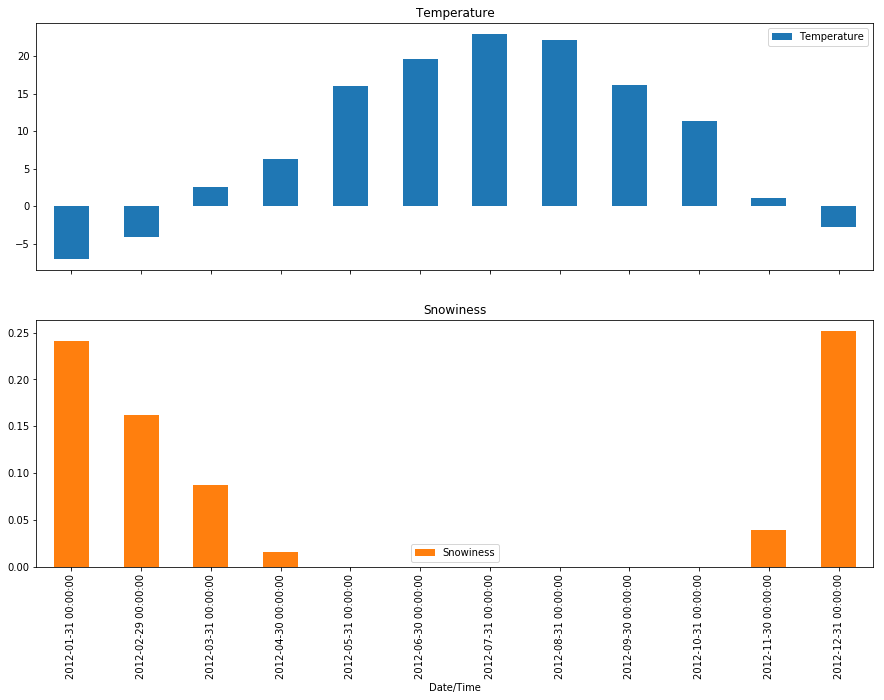

In [69]:
# # The usual preamble

# bikes['Berri 1'].plot()  ## plot of no of bikes travelling through berry street
# bikes.plot(figsize=(15, 10))  ## We can also plot all the columns just as easily. We'll make it a little bigger, too.
                                 ##   You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere. 
# weekday_counts.plot(kind='bar')   ## plot of no of bikes travelling through berry street according to weekdays
# complaint_counts[:10].plot(kind='bar')  ## plot top 10 complaint types
# is_snowing.astype(int).plot()  ## plot all snowing months
# median_temp_month_wise.plot(kind='bar') ## plots the median temperature month wise
# mean_temp_month_wise.plot(kind='bar') ## plots the mean temperature month wise
# stats.plot(kind='bar', subplots=True, figsize=(15, 10)) ## plot temperature and snowiness together
